In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Capstone 2
## Unsupervised Learning
### Clustering Customers and Impact Analysis on Customer Churn

## Data

In [2]:
data = pd.read_csv('https://query.data.world/s/kcovqti3l3v3hivkb5xat5zrtxq7hf')
############################ Business audience
########################### Define audience in intro

Format<br>
A data frame with 5000 observations on the following 18 variables.

churn<br>
a factor with levels No Yes

accountlength<br>
a numeric vector

internationalplan<br>
a factor with levels no yes

voicemailplan<br>
a factor with levels no yes

numbervmailmessages<br>
a numeric vector

totaldayminutes<br>
a numeric vector

totaldaycalls<br>
a numeric vector

totaldaycharge<br>
a numeric vector

totaleveminutes<br>
a numeric vector

totalevecalls<br>
a numeric vector

totalevecharge<br>
a numeric vector

totalnightminutes<br>
a numeric vector

totalnightcalls<br>
a numeric vector

totalnightcharge<br>
a numeric vector

totalintlminutes<br>
a numeric vector

totalintlcalls<br>
a numeric vector

totalintlcharge<br>
a numeric vector

numbercustomerservicecalls<br>
a numeric vector

Details<br>
This dataset is modified from the one stored at the UCI data repository (namely, the area code and phone number have been deleted). This is artificial data similar to what is found in actual customer profiles. Charges are in dollars.

Source<br>
Though originally on the UCI data repository, actual data was obtained via https://www.sgi.com/tech/mlc/db/

In [3]:
data

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


## Exploratory Data Analysis

In [4]:
# Print the object columns
object_columns = data.select_dtypes('object').columns
print('Object column names:', list(object_columns))

# Print the numeric columns
number_columns = data.select_dtypes('number').columns
print('\nNumber column names:', list(number_columns))

Object column names: ['churn', 'internationalplan', 'voicemailplan']

Number column names: ['accountlength', 'numbervmailmessages', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcalls', 'totalintlcharge', 'numbercustomerservicecalls']


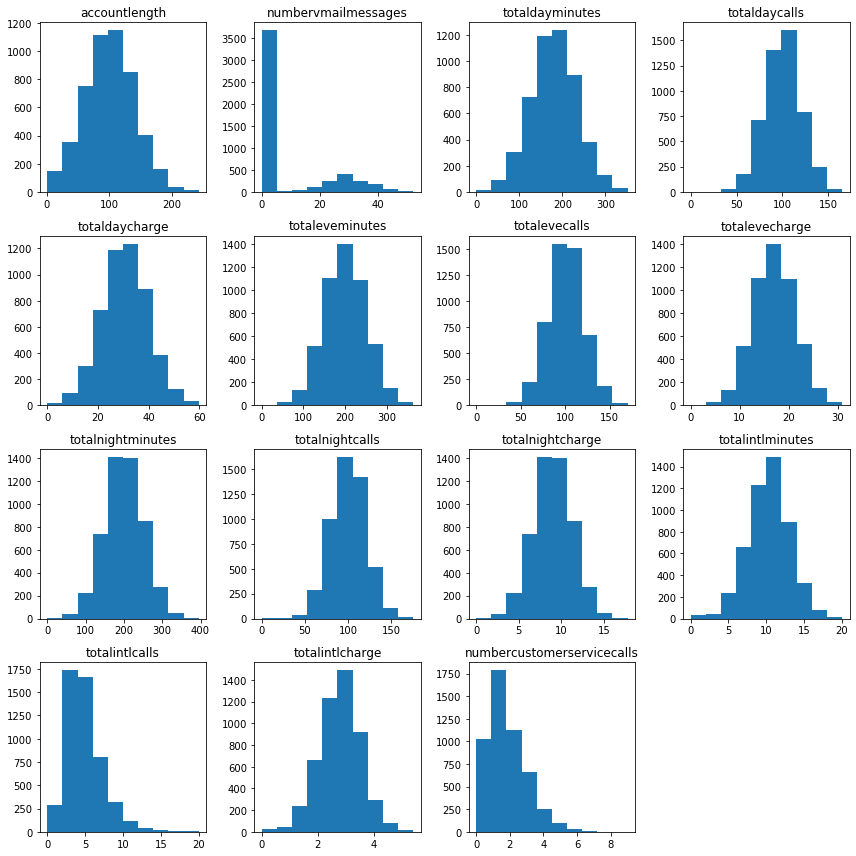

In [5]:
# Plot the numeric columns to view the distributions
from math import sqrt
def get_ceiling_sq(num):
    sq = sqrt(num)
    if sq != int(sq):
        sq = int(sq) + 1
    return sq

sq = get_ceiling_sq(len(number_columns))
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(number_columns, 1):
    plt.subplot(sq, sq, i)
    plt.hist(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

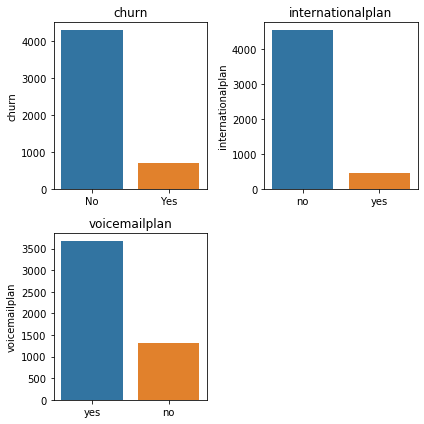

In [6]:
# Most columns follow a generally normal distribution!!

# Plot occurences of the categorical variables too
sq = get_ceiling_sq(len(object_columns))
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(object_columns, 1):
    plt.subplot(sq, sq, i)
    sns.barplot(y=data[col].value_counts(), x=data[col].unique())
    plt.title(col)

plt.tight_layout()
plt.show()

## Feature Engineering

In [7]:
# Binary encode the yes/no categorical columns
for col in object_columns:
    data[col] = data[col].str.lower()
    data[col] = np.where(data[col] == 'yes', 1, 0)
data.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [8]:
# Since churn is an interesting variable that we can't know right away, we'll drop it from the features
feats = data.drop('churn', axis=1)
feats.head()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
# Now we will scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_std = scaler.fit_transform(feats)

C:\Python37\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Python37\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
C:\Python37\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\Python37\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=T

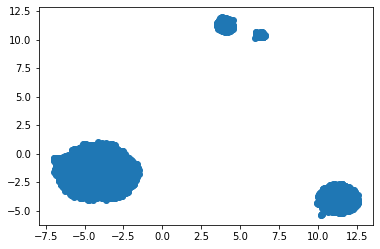

In [10]:
# For visualization purposes, use umap to reduce the dimensions down to x and y axes while preserving cluster structure
import umap

umap_model = umap.UMAP(n_neighbors=15, metric='euclidean', min_dist=.1, random_state=12)
umap_results = umap_model.fit_transform(X_std)

# Plot the resulting components
plt.scatter(umap_results[:,0], umap_results[:,1])
plt.show()

## Clustering Model

In [50]:
# There are four obvious clusters in the reduced feature space
# Implement a preliminary KMeans model and check performance.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4)
k_preds = k_means.fit_predict(X_std)

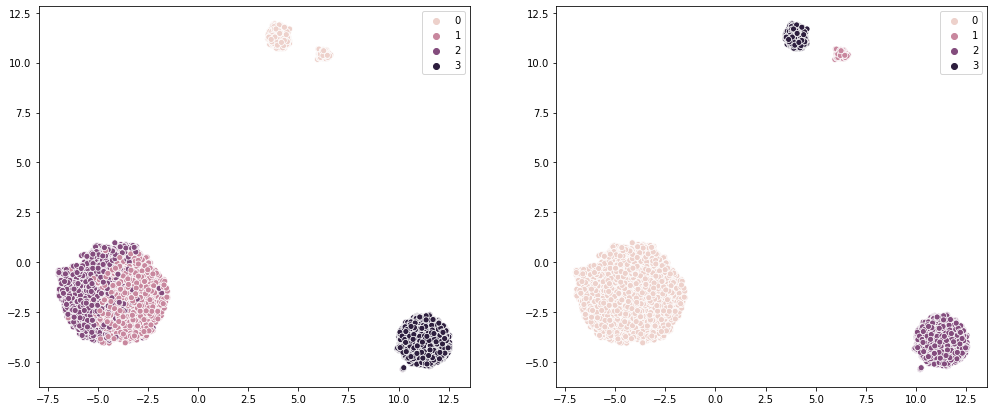

Silhouette score for KMeans: 0.09886904312975084
KMeans scores very low
---------------------------------------------
Silhouette score for Gaussian Mixture Model: 0.1521402099557881
This is a better score. Visually the clusters seem perfectly separated.


In [55]:
# Observing the normal-looking variances within each cluster, implement and score a gaussian mixture model
from sklearn.mixture import GaussianMixture
string_clusters='abcd'

gmm = GaussianMixture(n_components=4, random_state=116)
preds = gmm.fit_predict(X_std)

plt.figure(figsize=(17,7))

plt.subplot(121)
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=k_preds)

plt.subplot(122)
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=preds)
plt.show()

print('Silhouette score for KMeans:',silhouette_score(X_std, k_preds))
print('KMeans scores very low')
print('---------------------------------------------')
print('Silhouette score for Gaussian Mixture Model:', silhouette_score(X_std, preds))
print('This is a better score. Visually the clusters seem perfectly separated.')

## Cluster Analysis

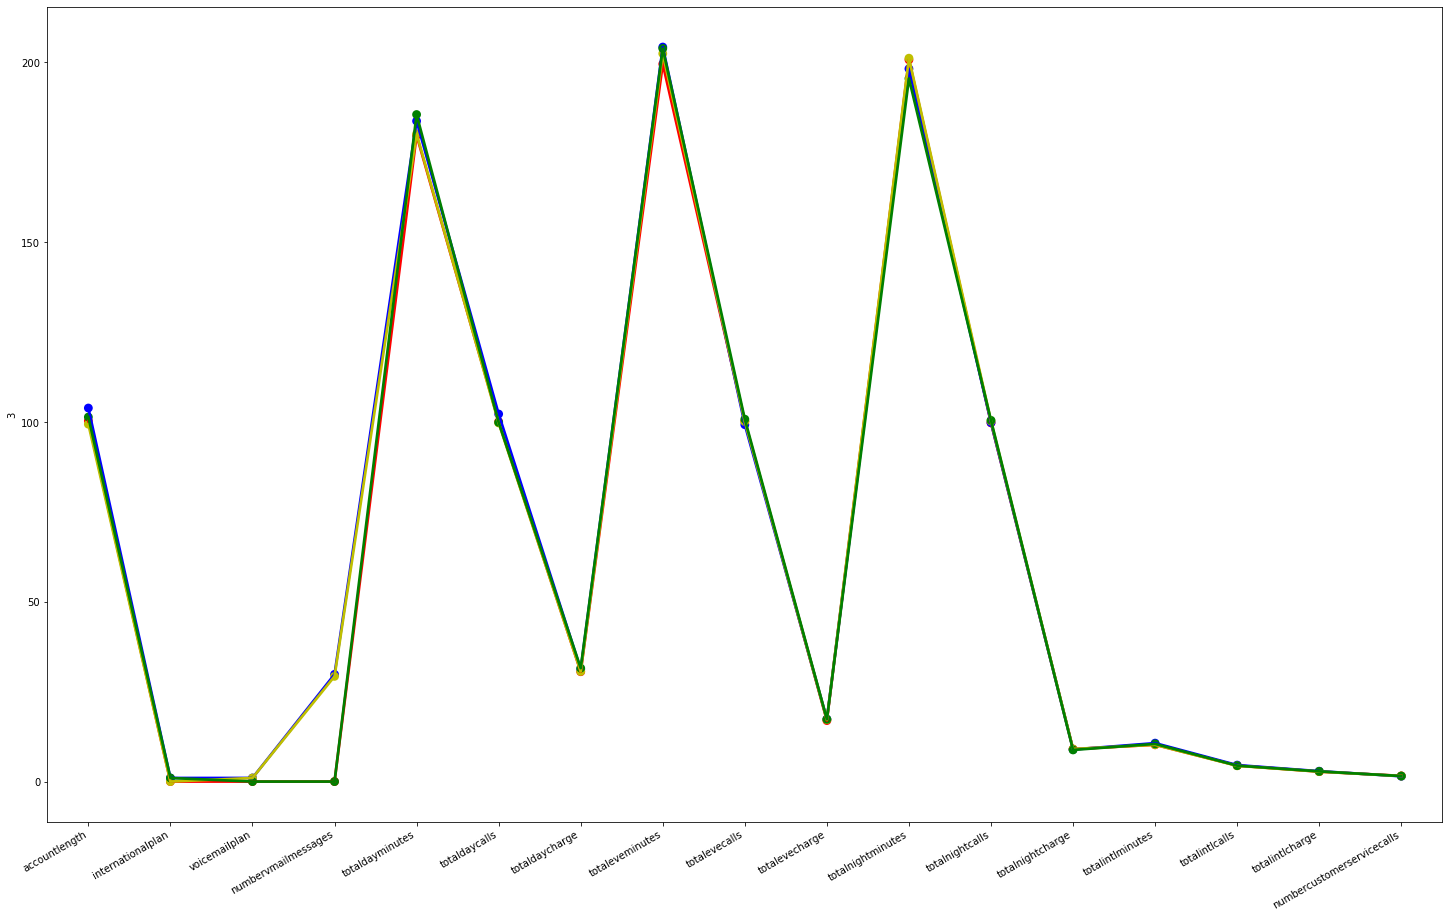

In [77]:
# To understand what sets the clusters apart, create a dataframe holding each gaussian cluster's center 
centers = pd.DataFrame(scaler.inverse_transform(gmm.means_), columns = feats.columns)

# Plot the changing features to visually check for differences
plt.figure(figsize=(25,15))
colours = 'rbyg'
for i in centers.index:
    sns.pointplot(x=centers.columns, y=centers.loc[i], color=colours[i], alpha=.9).set_xticklabels(labels=centers.columns,rotation=30, horizontalalignment='right')
plt.show()

In [14]:
# Besides one glaring feature, there are not many features that set apart each cluster
centers.columns

Index(['accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [15]:
# Look at one group of features at a time and sort by total in that group
# Start with day columns
day_df = centers.filter(like='day')
day_df.assign(sum=day_df.apply(lambda x: x.sum(), axis=1)).sort_values(by='sum', ascending=False)

,totaldayminutes,totaldaycalls,totaldaycharge,sum
1,183.669466,102.206107,31.224656,317.100229
3,185.481871,99.883041,31.532485,316.897398
2,180.122735,99.726510,30.621326,310.470570
0,179.682969,100.067166,30.546681,310.296816


In [16]:
# Check night columns
night_df = centers.filter(like='night')
night_df.assign(sum=night_df.apply(lambda x: x.sum(), axis=1)).sort_values(by='sum', ascending=False)

,totalnightminutes,totalnightcalls,totalnightcharge,sum
2,201.147232,100.270973,9.051745,310.469950
0,200.709175,99.744228,9.032021,309.485424
1,198.215267,99.801527,8.919618,306.936412
3,195.495029,100.444444,8.797427,304.736901


In [17]:
# Evening coluns
eve_df = centers.filter(like='eve')
eve_df.assign(sum=eve_df.apply(lambda x: x.sum(), axis=1)).sort_values(by='sum', ascending=False)

,totaleveminutes,totalevecalls,totalevecharge,sum
3,203.846491,100.769006,17.327105,321.942602
1,204.245802,99.236641,17.361221,320.843664
2,202.421728,100.078859,17.206082,319.706669
0,199.527556,100.209295,16.960051,316.696903


In [18]:
# International columns
intl_df = centers.filter(like='intl')
intl_df.assign(sum=intl_df.apply(lambda x: x.sum(), axis=1)).sort_values(by='sum', ascending=False)

,totalintlminutes,totalintlcalls,totalintlcharge,sum
1,10.689313,4.580153,2.886718,18.156183
3,10.473684,4.426901,2.828216,17.728801
0,10.232534,4.448276,2.763295,17.444105
2,10.235822,4.385067,2.764245,17.385134


In [19]:
# All leftover columns
seen = pd.concat([intl_df, day_df, night_df, eve_df], axis=1).columns
other_df = centers.drop(seen, axis=1)
other_df

,accountlength,internationalplan,voicemailplan,numbervmailmessages,numbercustomerservicecalls
0,100.319340,1.526557e-16,-1.110223e-16,-7.993606e-15,1.586507
1,103.870229,1.000000e+00,1.000000e+00,2.980916e+01,1.473282
2,99.373322,-4.163336e-17,1.000000e+00,2.925419e+01,1.546141
3,101.368421,1.000000e+00,1.110223e-16,0.000000e+00,1.535088


## Impact Analysis

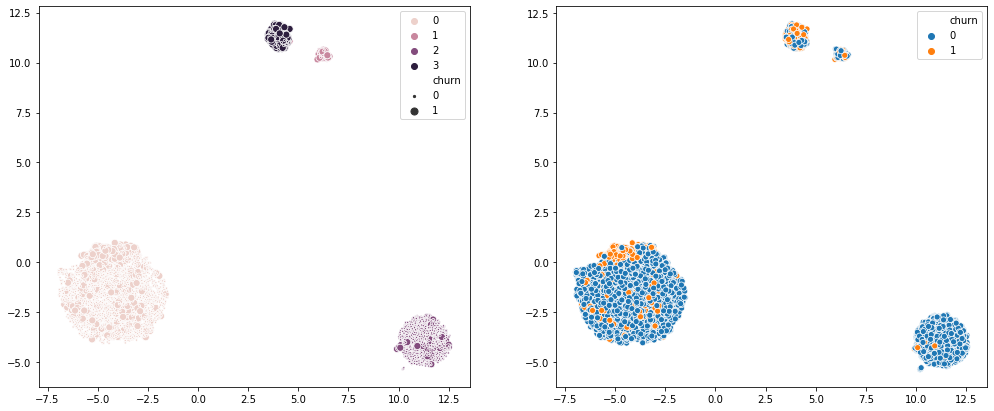

In [20]:
# Now visually analyze the effect of the customer's cluster on their likelihood to churn
plt.figure(figsize=(17, 7))
plt.subplot(121)
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=preds, size=data['churn'], sizes=(50,5))
plt.subplot(122)
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=data['churn'])
plt.show()

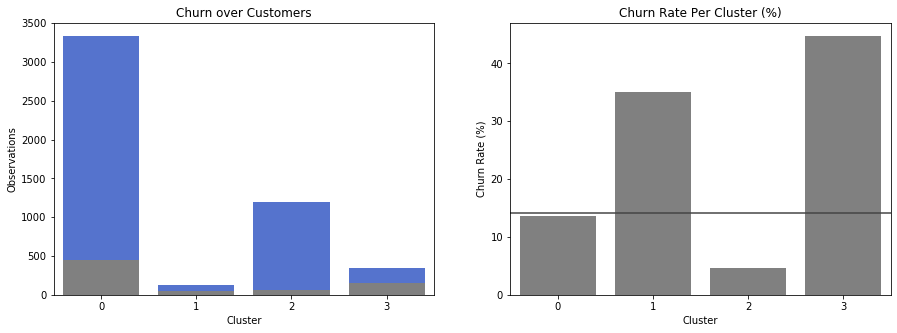

Clusters that have less than average churn amoung clusters [0, 2]


In [21]:
# Create a cross-tabulation of customers who churn and the learned clusters
cluster_churn = pd.crosstab(data['churn'], preds, margins=True)

# Create a series that holds the percentage of each cluster that churns
percent_churn = cluster_churn.loc[1,:] / cluster_churn.loc['All',:] * 100

# Create two graphs, one that shows actual numbers of customers in each cluster who churn and one that shows the scaled percentages of those churn rates per cluster.
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=percent_churn.index.drop('All'), y=cluster_churn.loc['All',:].drop(['All']), color='royalblue')
sns.barplot(x=percent_churn.index.drop('All'), y=cluster_churn.loc[1,:].drop('All'), color='grey')
plt.xlabel(xlabel='Cluster')
plt.ylabel(ylabel='Observations')
plt.title('Churn over Customers')
plt.subplot(122)
sns.barplot(x=percent_churn.index.drop('All'), y=percent_churn.drop('All'), color='grey')
plt.xlabel(xlabel='Cluster')
plt.ylabel(ylabel='Churn Rate (%)')
plt.axhline(percent_churn['All'], color='#444444')
plt.title('Churn Rate Per Cluster (%)')
plt.show()
low_churn = percent_churn.loc[percent_churn < percent_churn['All']].index
print('Clusters that have less than average churn amoung clusters', list(low_churn))

In [22]:
X_assigned = feats.copy()
X_assigned['cluster'] = preds
X_assigned.head()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,cluster
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,2
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,2
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,3
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,3


In [23]:
X_low_churn = X_assigned.loc[X_assigned['cluster'].isin(low_churn)]
X_low_churn

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,cluster
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,2
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,2
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,2
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,2
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


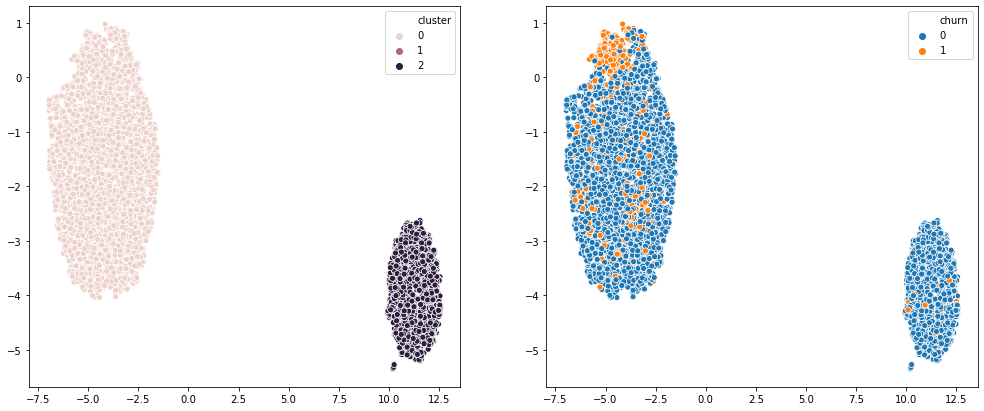

In [26]:
plt.figure(figsize=(17,7))
plt.subplot(121)
sns.scatterplot(umap_results[X_low_churn.index,0], umap_results[X_low_churn.index,1], hue=X_low_churn['cluster'])
plt.subplot(122)
sns.scatterplot(umap_results[X_low_churn.index,0], umap_results[X_low_churn.index,1], hue=data.loc[X_low_churn.index,'churn'])
plt.show()

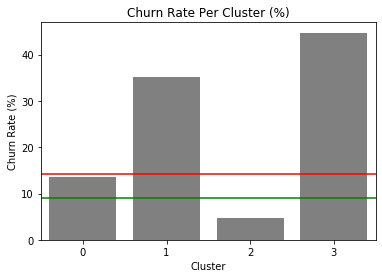

Current churn rate: 14.14%
Strategic churn rate: 9.13%
--------------------------------------------------------------------------
By using targeted strategies to focus on customers and efforts that fit within favorable clusters reduces the percentage of customers who churn by 5.01%


In [49]:
previous_churn_rate = percent_churn['All']
targeted_churn_rate = percent_churn.loc[low_churn].mean()


sns.barplot(x=percent_churn.index.drop('All'), y=percent_churn.drop('All'), color='grey')
plt.xlabel(xlabel='Cluster')
plt.ylabel(ylabel='Churn Rate (%)')
plt.axhline(percent_churn['All'], color='red')
plt.axhline(targeted_churn_rate, color='green')
plt.title('Churn Rate Per Cluster (%)')
plt.show()

print('Current churn rate: {0:.2f}%'.format(previous_churn_rate))
print('Strategic churn rate: {0:.2f}%'.format(targeted_churn_rate))
print('--------------------------------------------------------------------------')
print('By using targeted strategies to focus on customers and efforts that fit within favorable clusters reduces the percentage of customers who churn by {0:.2f}%'.format(
                    previous_churn_rate - targeted_churn_rate))